## 0 Upload the zip file datas and Unzip the Uploaded Zip File

In [ ]:
from google.colab import files

# Prompt the user to upload the zip file
uploaded = files.upload()

Saving data.zip to data.zip


In [ ]:
import zipfile

# Specify the path to your zip file
zip_file_path = "/content/data.zip"

# Specify the directory where you want to extract the contents
extraction_path = "/content/"

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

## 1. Install Dependencies and Setup

In [ ]:
import tensorflow as tf
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# 2. Remove dodgy images

In [ ]:
data_dir = 'data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
data_dir = "/content/data/"
image_exts = {'jpeg', 'jpg', 'png', 'gif'}  # Add other valid extensions as needed

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = Image.open(image_path)
            tip = img.format.lower()
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)  # You can uncomment this line to remove problematic images


# 3. Load Data

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

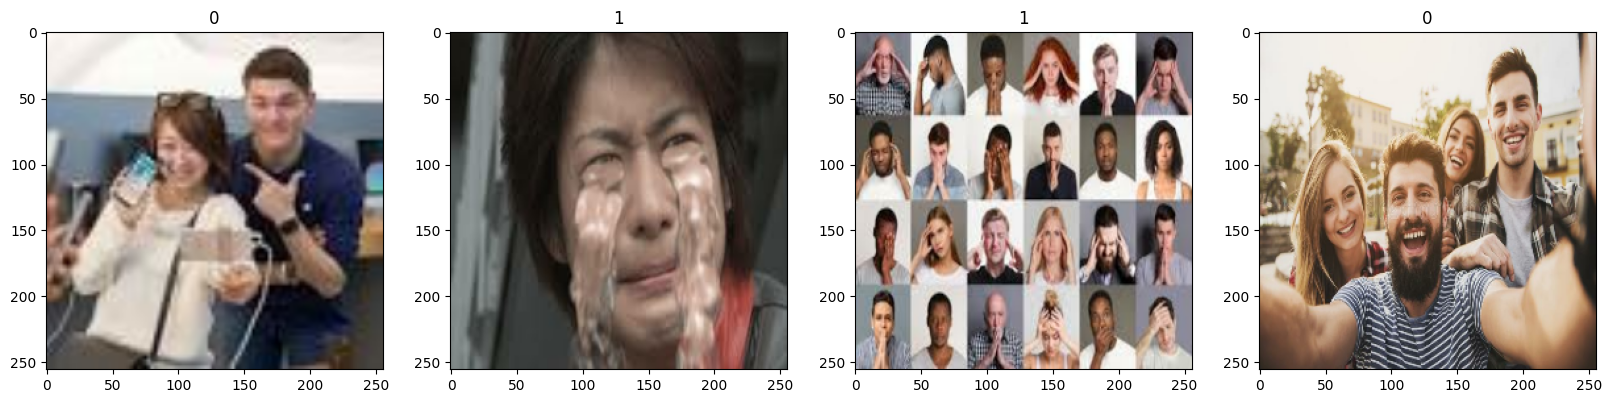

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          ...,
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01]],
 
         [[9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          ...,
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01]],
 
         [[9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          ...,
          [9.96078432e-01, 9.96078432e-01, 9.9607

# 5. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

7

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 21s 2s/step - loss: 1.0503 - accuracy: 0.5045 - val_loss: 0.6626 - val_accuracy: 0.4531
Epoch 2/20
7/7 [==============================] - 19s 2s/step - loss: 0.6210 - accuracy: 0.5938 - val_loss: 0.5327 - val_accuracy: 0.6875
Epoch 3/20
7/7 [==============================] - 19s 2s/step - loss: 0.5930 - accuracy: 0.7098 - val_loss: 0.5645 - val_accuracy: 0.7969
Epoch 4/20
7/7 [==============================] - 19s 2s/step - loss: 0.4728 - accuracy: 0.8527 - val_loss: 0.4111 - val_accuracy: 0.8438
Epoch 5/20
7/7 [==============================] - 19s 2s/step - loss: 0.3593 - accuracy: 0.8705 - val_loss: 0.3444 - val_accuracy: 0.8125
Epoch 6/20
7/7 [==============================] - 19s 2s/step - loss: 0.3074 - accuracy: 0.8661 - val_loss: 0.2520 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 19s 2s/step - loss: 0.2679 - accuracy: 0.8973 - val_loss: 0.2375 - val_accuracy: 0.8906
Epoch 8/20
7/7 [==================

# 8. Plot Performance

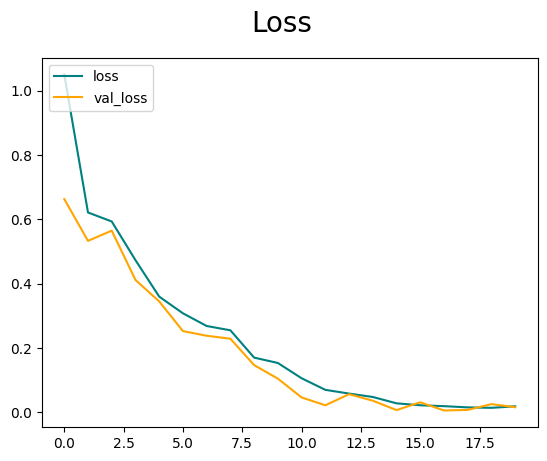

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

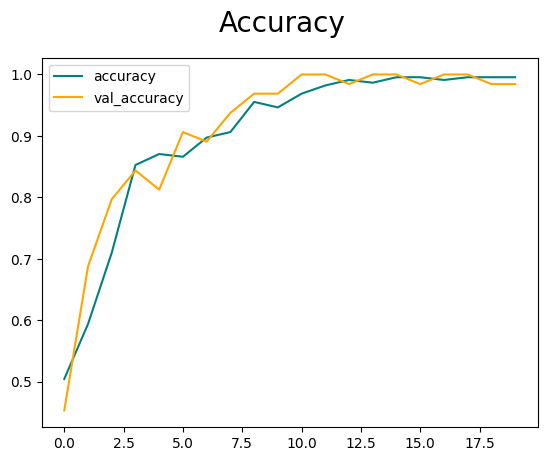

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 690ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

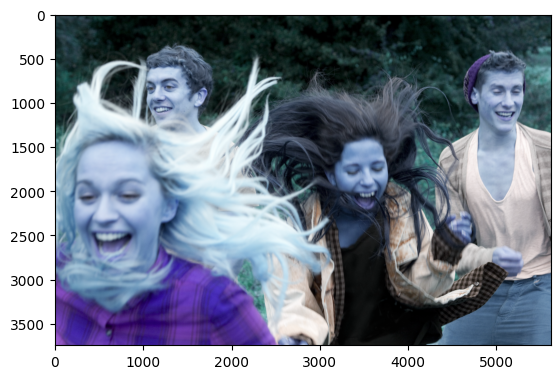

In [ ]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

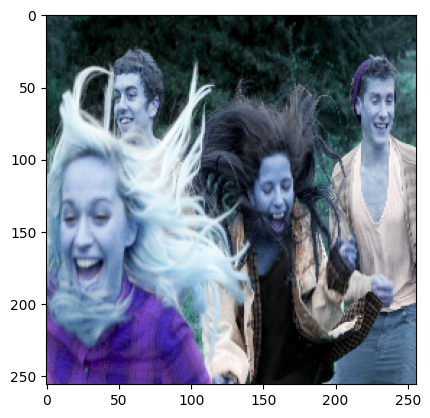

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 32ms/step


In [ ]:
yhat

array([[0.33469647]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.keras'))

In [ ]:
new_model = load_model('/content/models/imageclassifier.keras')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 382ms/step


array([[0.33469647]], dtype=float32)